In [1]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 

%matplotlib inline

In [4]:
geo_c = pd.read_excel("C:/Users/Владелец/Downloads/geo_comment.xlsx")

In [5]:
geo_c.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [13]:
geo_c.shape

(70382, 6)

In [14]:
geo_c.comment.nunique()

7335

Text(0.5, 1.0, 'Координаты участков')

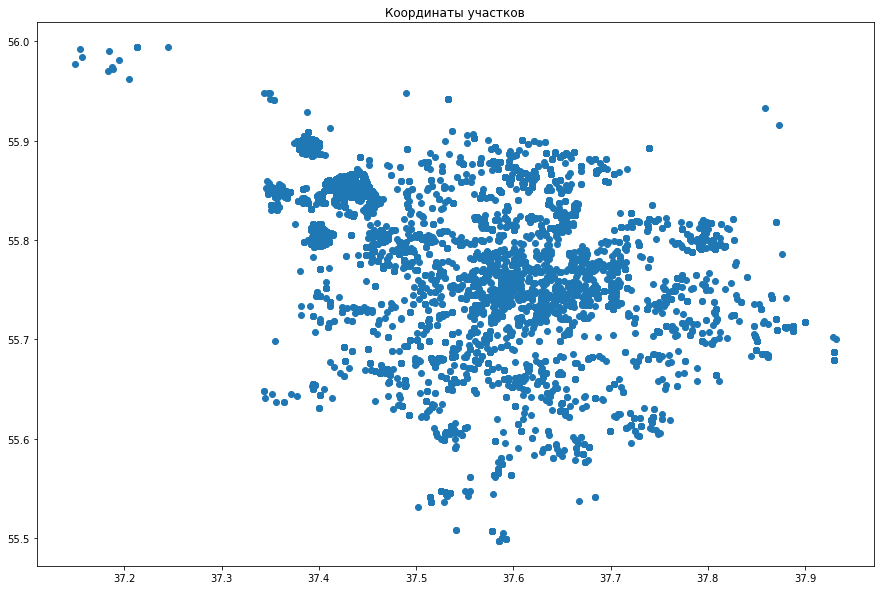

In [26]:
plt.figure(figsize = (15, 10))

plt.plot(geo_c.x, geo_c.y, "o")

plt.title("Координаты участков")

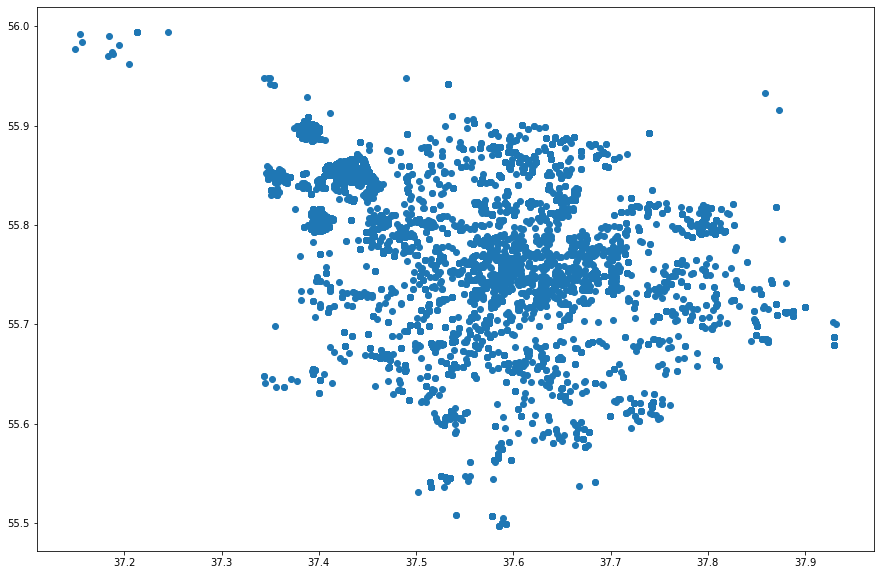

In [29]:
plt.figure(figsize = (15, 10))

plt.scatter(geo_c.x, geo_c.y)

In [31]:
town_c = geo_c[["x", "y"]]

In [32]:
town_c

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794
...,...,...
70377,37.454528,55.792331
70378,37.384325,55.899068
70379,37.421066,55.848756
70380,37.448509,55.793065


In [35]:
from sklearn.preprocessing import StandardScaler
#При кластеризации обязательно стандиртизировать признаки. Если одна фича важнее других, то оставить в обычном виде

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
#KMeans - центроиды, находят средние. Подходят когда кластеры четко выделены в дате

#Agglomerative - иерархическая кластеризация. По принципу дендаграмм 

#DBSCAN - применяется когда один кластер окружает другой. Работает "кружочком" - берется core точка и вокруг нее строятся круги.
#Все данные входящие в круг идут в один кластер. Жрет много памяти, лучше в sklearn не использовать, а написать самому. 

from sklearn.metrics import adjusted_rand_score, silhouette_score
#Метрики для кластеров

In [54]:
inertia = []
ks = range(1, 11)


for i in range(1, 11):
    km = KMeans(n_clusters = i)
    a = km.fit_predict(town_c)
    inertia.append(km.inertia_)

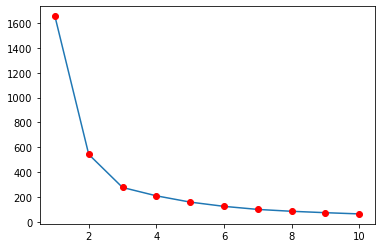

In [56]:
plt.plot(ks, inertia)

plt.plot(ks, inertia, "ro")

#Оптимальное количество кластеров - 3 или 4 - метод локтя

In [61]:
km = KMeans(n_clusters = 4)
km_town_c = km.fit_predict(town_c)


In [68]:
geo_c["District_clus"] = km_town_c

town_c["dist_clus"] = km_town_c

C:\Users\Владелец\AppData\Local\Temp\ipykernel_7648\115241761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_c["dist_clus"] = km_town_c


In [66]:
geo_c.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment,District_clus
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,2
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...,2
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...,2
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...,2
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...,2


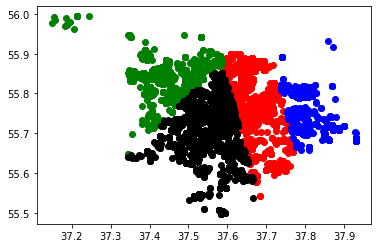

In [72]:
df1 = town_c[town_c["dist_clus"] == 0]
df2 = town_c[town_c["dist_clus"] == 1]
df3 = town_c[town_c["dist_clus"] == 2]
df4 = town_c[town_c["dist_clus"] == 3]

plt.scatter(df1.x, df1.y, color = "red")
plt.scatter(df2.x, df2.y, color = "green")
plt.scatter(df3.x, df3.y, color = "black")
plt.scatter(df4.x, df4.y, color = "blue")

plt.show()

In [82]:
geo_c

,Unnamed: 0,x,y,comment_class,multiplier,comment,District_clus
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,2
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...,2
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...,2
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...,2
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...,2
...,...,...,...,...,...,...,...
70377,70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...,1
70378,70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...,1
70379,70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл...",1
70380,70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...,1


In [86]:
votes = geo_c[["comment_class", "multiplier"]]

In [87]:
summ = []

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    a = km.fit_predict(votes)
    summ.append(km.inertia_)

C:\Users\Владелец\AppData\Local\Temp\ipykernel_7648\1464267938.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ks, summ, "ro", color = "blue")


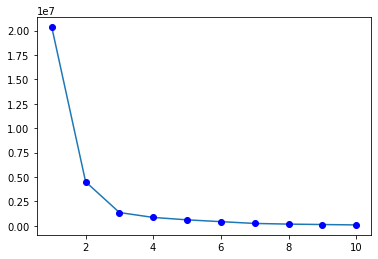

In [88]:
plt.plot(ks, summ)
plt.plot(ks, summ, "ro", color = "blue")

In [89]:
km = KMeans(n_clusters = 3)

votes_c = km.fit_predict(votes)

In [90]:
votes["clust"] = votes_c

C:\Users\Владелец\AppData\Local\Temp\ipykernel_7648\3195368811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes["clust"] = votes_c


In [92]:
geo_c["clust"] = votes_c

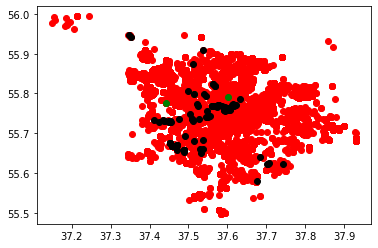

In [93]:
df1 = geo_c[geo_c["clust"] == 0]
df2 = geo_c[geo_c["clust"] == 1]
df3 = geo_c[geo_c["clust"] == 2]


plt.scatter(df1.x, df1.y, color = "red")
plt.scatter(df2.x, df2.y, color = "green")
plt.scatter(df3.x, df3.y, color = "black")